### 1.接口总览

class  sklearn.ensemble.RandomForestRegressor (n_estimators=’warn’, criterion=’mse’, max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,
n_jobs=None, random_state=None, verbose=0, warm_start=False)

### 2.重要参数，属性，接口

#### 2.1criterion（mse,friedman_mse,mae）

#### 2.2最重要的属性和接口

最重要的属性和接口，都与随机森林的分类器相一致，还是apply, fit, predict和score最为核心。值得一提的是，随
机森林回归并没有predict_proba这个接口，因为对于回归来说，并不存在一个样本要被分到某个类别的概率问
题，因此没有predict_proba这个接口。

### 3.导入相关库

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

### 4.写个简单的随机森林回归

In [4]:
boston_data = load_boston()
rfr = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(rfr,boston_data.data,boston_data.target,cv=10)

array([ 0.69241975,  0.80040014,  0.32339635,  0.7874838 ,  0.82642804,
        0.76089612,  0.56903709,  0.37099534, -0.58136724,  0.19112288])

In [5]:
cross_val_score(rfr,boston_data.data,boston_data.target,cv=10,scoring='neg_mean_squared_error')
#注意在这里，如果不填写scoring = "neg_mean_squared_error"，交叉验证默认的模型衡量指标是R平方，因此交叉验证的结果可能有正也可能有负

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

### 5.实例：用随机森林回归填补缺失值

#### 5.1导入相关库

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer #用来方便处理缺失值
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline

#### 5.2以波士顿数据集为例，导入完整的数据集并探索

In [17]:
boston_data = load_boston()
boston_data.data.shape

(506, 13)

In [18]:
x_full= boston_data.data
y_full= boston_data.target
all_samples_count = x_full.shape[0]
all_features_count= x_full.shape[1]

#### 5.3为完整数据集放入数据集

In [19]:
rng = np.random.RandomState(0)
missing_rate = 0.5
missing_samples_count = int(np.floor(all_samples_count * all_features_count * missing_rate))

In [34]:
missing_features = rng.randint(0,all_features_count,missing_samples_count) #缺失值X轴坐标
missing_samples = rng.randint(0,all_samples_count,missing_samples_count)#缺失值Y轴坐标
missing_samples[:5]

array([393,  29,  29,  26,   4])

In [35]:
x_missing = x_full.copy()
y_missing = y_full.copy()

In [42]:
x_missing[missing_samples,missing_features] = np.nan #给随机采样的数据坐标对应的数据赋空值

In [49]:
x_missing = pd.DataFrame(x_missing)
x_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.9,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33


#### 5.4使用0和均值填补缺失值

In [50]:
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
x_missing_mean = imp_mean.fit_transform(x_missing)
x_missing_mean = pd.DataFrame(x_missing_mean)
x_missing_mean.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.627579,18.000000,11.163464,0.066007,0.538000,6.305921,65.2,4.090000,1.000000,296.000000,18.521192,352.741952,4.980000
1,0.027310,0.000000,11.163464,0.000000,0.469000,6.305921,78.9,4.967100,2.000000,405.935275,18.521192,396.900000,9.140000
2,0.027290,10.722951,7.070000,0.000000,0.564128,7.185000,61.1,3.856371,2.000000,242.000000,18.521192,352.741952,12.991767
3,3.627579,10.722951,11.163464,0.000000,0.458000,6.305921,45.8,3.856371,9.383871,222.000000,18.700000,352.741952,12.991767
4,3.627579,0.000000,2.180000,0.000000,0.564128,7.147000,67.4,3.856371,9.383871,405.935275,18.700000,352.741952,5.330000


In [51]:
imp_zero = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
x_missing_zero = imp_zero.fit_transform(x_missing)
x_missing_zero = pd.DataFrame(x_missing_zero)
x_missing_zero.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.0,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.9,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.0,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.0,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.0,5.33


#### 5.5使用随机森林填补缺失

In [54]:
x_missing_reg = x_missing.copy()
sortindex = np.argsort(x_missing_reg.isnull().sum(axis=0)).values #从小到大排列

In [58]:
for i in sortindex:
    #构造新特征矩阵和标签矩阵
    df =x_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)
    #将填补好的特征返回到我们的原始的特征矩阵中
    x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i] = Ypredict

#### 5.6对填补好的数据进行建模

In [59]:
#对所有数据进行建模，取得MSE结果
X=[x_full,x_missing_mean,x_missing_zero,x_missing_reg]
mse=[]
std=[]
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',cv=5).mean()
    mse.append(scores * -1)

#### 5.7用所得的结果画出条形图

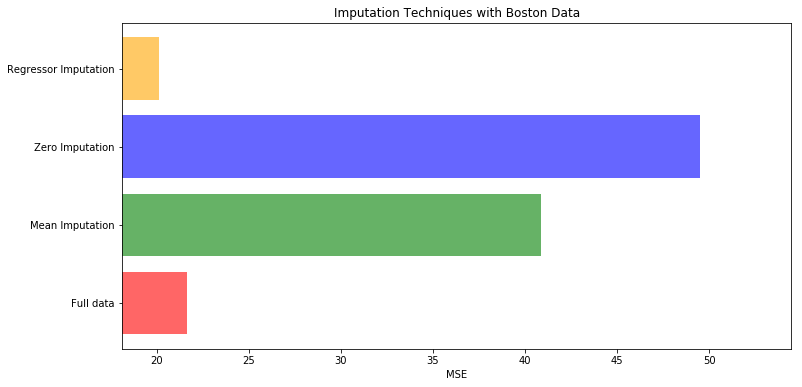

In [71]:
x_labels = ['Full data','Mean Imputation','Zero Imputation','Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color=colors[i],alpha=0.6,align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()


In [73]:
x_labels = ['Full data','Zero Imputation','Mean Imputation','Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-73-dd3d74f23f0c>, line 2)